In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy
import joblib


C:\Users\Andy\AppData\Local\Temp\ipykernel_13476\3579087860.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
path = r'C:\Users\Andy\Documents\Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\Andy\\Documents\\Instacart Basket Analysis'

In [4]:
df_customers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'), index_col = False)

In [5]:
df_customers

user_id First Name    Surnam  Gender           STATE  Age date_joined  \
0         26711    Deborah  Esquivel  Female        Missouri   48    1/1/2017   
1         33890   Patricia      Hart  Female      New Mexico   36    1/1/2017   
2         65803    Kenneth    Farley    Male           Idaho   35    1/1/2017   
3        125935   Michelle     Hicks  Female            Iowa   40    1/1/2017   
4        130797        Ann   Gilmore  Female        Maryland   26    1/1/2017   
...         ...        ...       ...     ...             ...  ...         ...   
206204   168073       Lisa      Case  Female  North Carolina   44    4/1/2020   
206205    49635     Jeremy   Robbins    Male          Hawaii   62    4/1/2020   
206206   135902      Doris  Richmond  Female        Missouri   66    4/1/2020   
206207    81095       Rose   Rollins  Female      California   27    4/1/2020   
206208    80148    Cynthia     Noble  Female        New York   55    4/1/2020   

        n_dependants fam_status  income  
0                  3    married  165665  
1                  0     single   59285  
2                  2    married   99568  
3                  0     single   42049  
4                  1    married   40374  
...              ...        ...     ...  
206204             1    married  148828  
206205             3    married  168639  
206206             2    married   53374  
206207             1    married   99799  
206208             1    married   57095  

[206209 rows x 10 columns]

In [6]:
#df_customers = df_customers.replace([np.nan, -np.inf], 0)

In [7]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   First Name    194950 non-null  object
 2   Surnam        206209 non-null  object
 3   Gender        206209 non-null  object
 4   STATE         206209 non-null  object
 5   Age           206209 non-null  int64 
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int64 
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.7+ MB


In [8]:
#check for mixed data types
mixed_data_types = df_customers.apply(lambda x: pd.api.types.is_object_dtype(x))

In [9]:
mixed_data_types

user_id         False
First Name       True
Surnam           True
Gender           True
STATE            True
Age             False
date_joined      True
n_dependants    False
fam_status       True
income          False
dtype: bool

#### Converting non mixed data types to mixed data types.

In [10]:
columns_to_convert = ['user_id', 'Age', 'n_dependants', 'income']

In [11]:
df_customers[columns_to_convert] = df_customers[columns_to_convert].astype('object')

In [12]:
df_customers.apply(lambda x: pd.api.types.is_object_dtype(x))

user_id         True
First Name      True
Surnam          True
Gender          True
STATE           True
Age             True
date_joined     True
n_dependants    True
fam_status      True
income          True
dtype: bool

#### |All data types has been successfully converted to mixed data types

In [13]:
df_customers.rename(columns={'First Name': 'first_name','Surnam': 'last_name', 'Gender': 'gender', 'STATE': 'state', 'Age': 'age'}, inplace=True)

df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  object
 1   first_name    194950 non-null  object
 2   last_name     206209 non-null  object
 3   gender        206209 non-null  object
 4   state         206209 non-null  object
 5   age           206209 non-null  object
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  object
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  object
dtypes: object(10)
memory usage: 15.7+ MB


#### All data types have been converted to mixed data types

## 3. Conduct Consistency Checks

In [14]:
#check for missing values
df_customers.isnull().sum()

user_id             0
first_name      11259
last_name           0
gender              0
state               0
age                 0
date_joined         0
n_dependants        0
fam_status          0
income              0
dtype: int64

In [15]:
#check for duplicates
df_dups = df_customers[df_customers.duplicated()]
df_dups.shape

(0, 10)

In [16]:
#check for missing values in income
df_customers['income'].value_counts(dropna=False, sort=True)

income
57192     10
95891     10
95710     10
97532      9
98675      9
          ..
73141      1
71524      1
74408      1
44780      1
148828     1
Name: count, Length: 108012, dtype: int64

1. first_name has 11259 null values but it seems there's no serious missing values that'll mess up the analysis. no action required.
2. There are no duplicates
3. no missing values in income

gender

In [17]:
df_customers['gender'].value_counts(dropna=False)

gender
Male      104067
Female    102142
Name: count, dtype: int64

1. no change needed

state

In [18]:
df_customers['state'].value_counts(dropna=False)

state
Florida                 4044
Colorado                4044
Illinois                4044
Alabama                 4044
District of Columbia    4044
Hawaii                  4044
Arizona                 4044
Connecticut             4044
California              4044
Indiana                 4044
Arkansas                4044
Alaska                  4044
Delaware                4044
Iowa                    4044
Idaho                   4044
Georgia                 4044
Wyoming                 4043
Mississippi             4043
Oklahoma                4043
Utah                    4043
New Hampshire           4043
Kentucky                4043
Maryland                4043
Rhode Island            4043
Massachusetts           4043
Michigan                4043
New Jersey              4043
Kansas                  4043
South Dakota            4043
Minnesota               4043
Tennessee               4043
New York                4043
Washington              4043
Louisiana               4043
Montana 

1. Based on the provided list, there are 51 unique entries 
2. District of Colombia is counted as a state as to why it's 51 and not 50
3. Almost all of the values are 4043 except for some at the top which are 4044

age

In [19]:
df_customers['age'].describe()

count     206209
unique        64
top           19
freq        3329
Name: age, dtype: int64

In [20]:
df_customers['age'].value_counts()

age
19    3329
55    3317
51    3317
56    3306
32    3305
      ... 
65    3145
25    3127
66    3114
50    3102
36    3101
Name: count, Length: 64, dtype: int64

#### Checking for age distribution

Text(0.5, 1.0, 'Age Distribution')

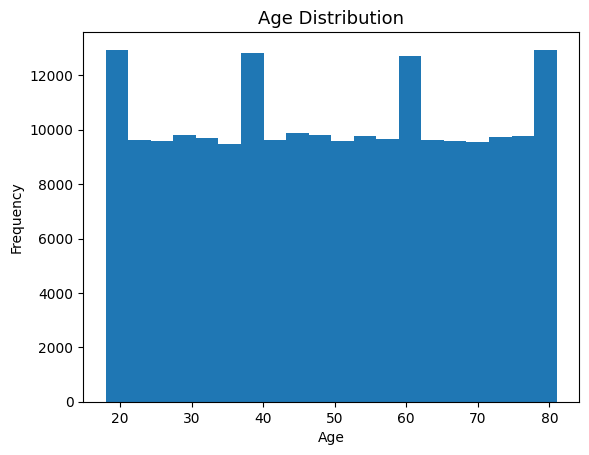

In [21]:
df_customers['age'].plot.hist(bins=20, xlabel='Age')
plt.title('Age Distribution', fontsize=13)

1. There are no obscure missing values for the age distribution. 
2. Peak ages seems to be 20, 40, 60, and 80.
3. There are no outliers in age distribution.

#### Join dates

In [22]:
df_customers['date_joined'].min()

'1/1/2017'

In [23]:
df_customers['date_joined'].max()

'9/9/2019'

In [24]:
df_customers['date_joined'].value_counts(dropna=False, sort=False)

date_joined
1/1/2017     159
1/2/2017     154
1/3/2017     169
1/4/2017     188
1/5/2017     177
            ... 
3/28/2020    197
3/29/2020    171
3/30/2020    165
3/31/2020    149
4/1/2020     169
Name: count, Length: 1187, dtype: int64

1. First and latest join dates are from 2017-01-01 to 2020-04-01
2. No missing values in date_joined

#### n_dependants. Checking for distribution

In [25]:
df_customers['n_dependants'].value_counts(dropna=False)

n_dependants
0    51602
3    51594
1    51531
2    51482
Name: count, dtype: int64

Text(0.5, 1.0, '# Distribution of dependents')

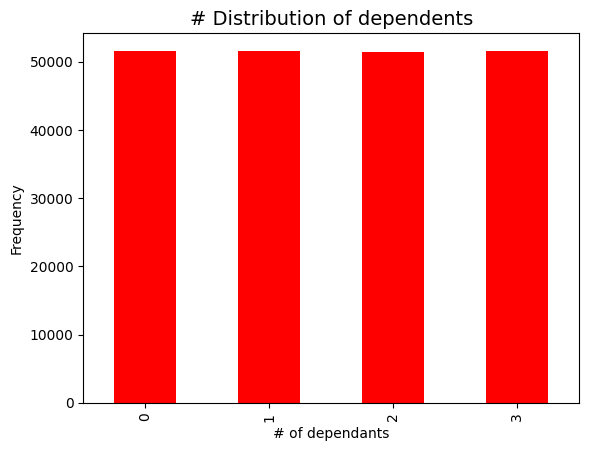

In [26]:
df_customers['n_dependants'].value_counts(dropna=True).sort_index().plot.bar(color=['red'], ylabel='Frequency', 
                                xlabel='# of dependants')
plt.title('# Distribution of dependents', fontsize=14)

1. Equally distributed
2. No outliers or missing values

In [27]:
df_customers['fam_status'].value_counts(dropna=False)

fam_status
married                             144906
single                               33962
divorced/widowed                     17640
living with parents and siblings      9701
Name: count, dtype: int64

#### Income

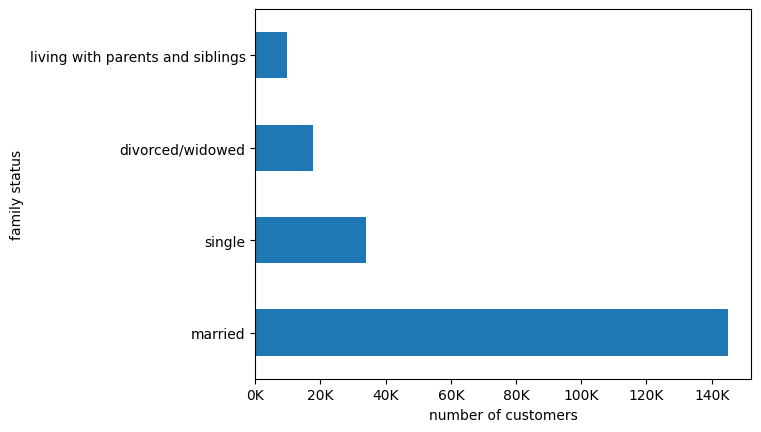

In [28]:
hist_fam_status =  df_customers['fam_status'].value_counts(dropna=False).plot.barh(
    xlabel="number of customers", ylabel='family status')
hist_fam_status.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y,pos: format(y/1000,'1.0f')+'K'))

In [29]:
df_customers['income'].describe()

count     206209
unique    108012
top        57192
freq          10
Name: income, dtype: int64

In [30]:
df_customers['income'].median()

93547.0

<Axes: xlabel='income', ylabel='income'>

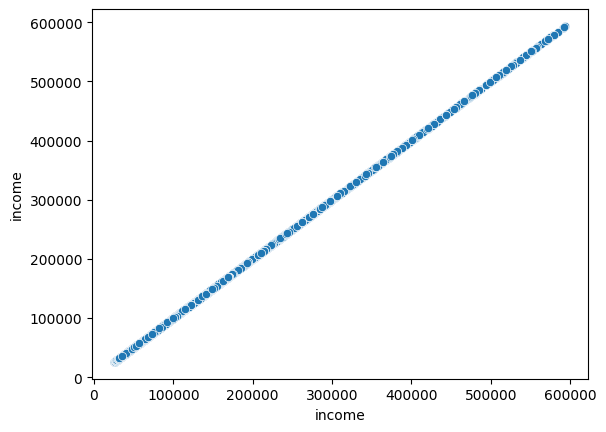

In [31]:
sns.scatterplot(x="income", y="income", data=df_customers)

<Axes: ylabel='Frequency'>

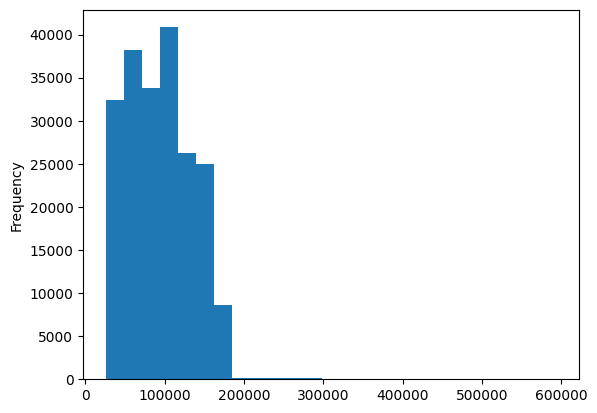

In [32]:
bins = [100000,200000,300000,400000, 500000]
df_customers['income'].plot.hist(bins=25)

In [33]:
df_check_income = df_customers[df_customers['income'] > 300000]
df_check_income.sort_values(by='income', ascending=True, )

user_id first_name   last_name  gender           state age date_joined  \
979     200930    Charles     Nichols    Male  South Carolina  60    1/6/2017   
86870    71498     Gloria    Stafford  Female        Virginia  69   5/14/2018   
138764  151552       Mark        Neal    Male        Oklahoma  71   3/11/2019   
47787   205650     Jeremy        Vang    Male        Kentucky  62   10/2/2017   
58395    77541   Kimberly    Anderson  Female         Montana  25   12/3/2017   
...        ...        ...         ...     ...             ...  ..         ...   
167037  189861     Pamela      Jordan  Female    Pennsylvania  47   8/21/2019   
111950  187680  Catherine      Church  Female         Wyoming  43   10/7/2018   
81583   103702    Kathryn  Mclaughlin  Female       Louisiana  55   4/14/2018   
202655   98580        NaN   Patterson    Male      Washington  43   3/12/2020   
21726    58596     Thomas       Cohen    Male      Washington  75    5/6/2017   

       n_dependants        fam_status  income  
979               1           married  300913  
86870             3           married  302234  
138764            1           married  302363  
47787             0  divorced/widowed  302526  
58395             2           married  302561  
...             ...               ...     ...  
167037            0            single  584097  
111950            2           married  590790  
81583             3           married  591089  
202655            2           married  592409  
21726             2           married  593901  

[382 rows x 10 columns]

1. Right skewed distribution. Median is between 93547.0 to 94632
2. There are incomes from 300k to 593k but the median is less than that.
3. No outliers were found

#### Importing df_ords_prods dataset

In [34]:
df_ords_prods = pd.read_pickle(os.path.join(path,'02 Data/Prepared Data/orders_products_merged_2.0.pkl'))

In [35]:
df_ords_prods.shape

(32404859, 21)

In [36]:
#df_ords_prods = df_ords_prods.replace([np.nan, -np.inf], 0)

In [37]:
df_ords_prods.head()

product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies        61             19     5.8   
1           1  Chocolate Sandwich Cookies        61             19     5.8   
2           1  Chocolate Sandwich Cookies        61             19     5.8   
3           1  Chocolate Sandwich Cookies        61             19     5.8   
4           1  Chocolate Sandwich Cookies        61             19     5.8   

   order_id  user_id eval_set  order_number  orders_day_of_week  ...  \
0   3139998      138    prior            28                   6  ...   
1   1977647      138    prior            30                   6  ...   
2    389851      709    prior             2                   0  ...   
3    652770      764    prior             1                   3  ...   
4   1813452      764    prior             3                   4  ...   

   days_since_prior_order  add_to_cart_order  reordered  _merge max_order  \
0                     3.0                  5          0    both        32   
1                    20.0                  1          1    both        32   
2                     6.0                 20          0    both         5   
3                     NaN                 10          0    both         3   
4                     9.0                 11          1    both         3   

       loyalty_flag average_price  spending_flag median_orders  \
0  Regular customer      6.935811    Low spender           8.0   
1  Regular customer      6.935811    Low spender           8.0   
2      New customer      7.930208    Low spender           8.0   
3      New customer      4.972414    Low spender           9.0   
4      New customer      4.972414    Low spender           9.0   

   order_frequency_flag  
0     Frequent customer  
1     Frequent customer  
2     Frequent customer  
3     Frequent customer  
4     Frequent customer  

[5 rows x 21 columns]

In [38]:
df_ords_prods['prices'] = df_ords_prods['prices'].astype('float32')


In [39]:
df_ords_prods['mean_expenses'] = df_ords_prods['prices'].astype('float32')


In [40]:
#dropping the merge and eval column because there is no use for it and _merge column creates conflict
df_ords_prods.drop(columns=['_merge'], inplace=True)

In [41]:
#df_ords_prods = df_ords_prods.drop(columns=['eval_set'])


In [42]:
df_ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 21 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   prices                  float32
 5   order_id                int64  
 6   user_id                 int64  
 7   eval_set                object 
 8   order_number            int64  
 9   orders_day_of_week      int64  
 10  hour_of_day_ordered     int64  
 11  days_since_prior_order  float64
 12  add_to_cart_order       int64  
 13  reordered               int64  
 14  max_order               int64  
 15  loyalty_flag            object 
 16  average_price           float64
 17  spending_flag           object 
 18  median_orders           float64
 19  order_frequency_flag    object 
 20  mean_expenses           float32
dtypes: float32(2), float64(3), in

#### Merging customer data with df_ords_prods using user_id as primary linking key

In [43]:
df_ords_prods_customers_left = df_ords_prods.merge(df_customers, on=['user_id'], indicator=True)

In [44]:
df_ords_prods_customers_left['_merge'].value_counts(dropna=False)

_merge
both          32404859
left_only            0
right_only           0
Name: count, dtype: int64

In [45]:
df_ords_prods_customers_left.shape

(32404859, 31)

#### Dropping merge column in merged dataframe

In [46]:
df_ords_prods_customers_left.drop(columns=['_merge'], inplace=True)

In [47]:
df_ords_prods_customers_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   prices                  float32
 5   order_id                int64  
 6   user_id                 object 
 7   eval_set                object 
 8   order_number            int64  
 9   orders_day_of_week      int64  
 10  hour_of_day_ordered     int64  
 11  days_since_prior_order  float64
 12  add_to_cart_order       int64  
 13  reordered               int64  
 14  max_order               int64  
 15  loyalty_flag            object 
 16  average_price           float64
 17  spending_flag           object 
 18  median_orders           float64
 19  order_frequency_flag    object 
 20  mean_expenses           float32
 21  first_name              objec

#### Exporting new merged dataset to pkl

In [48]:
df_ords_prods_customers_left.to_pickle(os.path.join(path,'02 Data/Prepared Data/ords_prods_customers_left.pkl'))